<a href="https://colab.research.google.com/github/lisetteR/Retail-unfinished/blob/main/assignment_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

# Assignment: Retail

Congratulations! You've reached the final assignment for the course before the bonus modules. Here we'll ask you to work with a dataset from the Dutch *Centraal Bureau voor de Statistiek* (CBS, English: Statistics Netherlands). It contains monthly growth percentages for various branches of the retail sector. You'll be required to answer open questions as well as write code that handles the data and crunches numbers.

*Answer open questions as though you were writing a report. Answers that are too vague, too short or too sloppy will be rejected.*

## 0. Load required modules

First, we need to load some modules that we're going to use. Do that in the next code cell. If you don't know yet which modules you'll use, just read on and come back here to import them later. **Don't forget to run the cell whenever you make an edit!**

In [ ]:
import csv
from collections import OrderedDict
import datetime
from datetime import date, datetime
%matplotlib inline
from matplotlib import pyplot as plt
from tabulate import tabulate


## 1. Data Preparation
Now we need to load and parse the data. The data should be located in the same folder as this notebook (whether that's on Google Colab or your local machine). Make sure you have working file path from your notebook to the supplied `data.csv` file. Put an `x` in the checkbox below when you're ready.

- [x] *I have a working file path to the `data.csv` file.*

You are now ready to proceed with reading the data into your program.

### 1.1 Read the CSV

The data comes in the form of a `csv`-file. CSV stands for 'comma separated values'. Oddly enough it need not be the case that the values are *really* separated by commas. In this case, the **delimiter** - the character that separates the columns within a datapoint - is *not* a comma. It's up to you to inspect `data.csv` and find out what the delimiter is.

Once you know what the delimiter is, you can use Python's `csv` module to read each of the datapoints to a dictionary. Some tips:

- The module's name is `csv`.
- You can find its documentation [here](https://docs.python.org/3/library/csv.html)
- We suggest you use the `DictReader` class. There's an example on how to use `DictReader` in the linked documentation.
- Instead of printing the rows (like in the example), we suggest you store all the rows as `dict`s in a `list`.

**1. In the code cell below, write code that opens and reads the data. By the end of the cell, you should have a variable `data` that is a list of dictionaries that each contain a datapoint.**

In [ ]:
# Open and read the data
with open('retail-data.csv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    data = []
    for row in reader:
        data.append(row)

print(type(data), data[0])


<class 'list'> OrderedDict([('Bedrijfstakken/branches (SBI 2008)', '4711, 472 Winkels in voedingsmiddelen'), ('Perioden', '2005 januari'), ('Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)', '    73.1'), ('Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)', '    86.4')])


### 1.2 Parse and clean the data

You now have a list of dictionaries that each contain some data. But what data? Answer the following questions to become familiar with this dataset. It requires you to write and execute Python code (you can add code cells if you wish), and also search the web for terms you're not familiar with.

**2. What are the column names in this dataset, and what do they mean? Be specific.**

The code is added after question 4.

The column names are: 

Bedrijfstakken/branches (SBI 2008): hierin wordt de Standaard Bedrijfsindeling (SBI) weergegeven. Dit is een hiërarchische indeling van economische activiteiten die het CBS onder meer gebruikt om bedrijfseenheden in te delen naar hun hoofdactiviteit. Bron: https://www.cbs.nl/nl-nl/onze-diensten/methoden/classificaties/activiteiten/sbi-2008-standaard-bedrijfsindeling-2008. 

Perioden: hierin wordt het jaartal en de naam van de maand weergegeven waarop de waarde betrekking heeft.

Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100): hierin wordt de ontwikkeling van de geldopbrengst van de omzet (de waarde) weergegeven. Een indexcijfer geeft de verhouding weer tussen de waarde van de geldopbrengst van de omzet in een bepaalde periode en de waarde van diezelfde geldopbrengst van de omzet in de basisperiode. Deze basisperiode is 2015 en heeft het indexcijfer 100. De uitkomsten zijn ongecorrigeerd, dit houdt in dat de uitkomsten niet gecorrigeerd zijn voor koopdag- en/of seizoeneffecten. Bron: https://www.cbs.nl/nl-nl/cijfers/detail/83868NED?q=indexcijfers#Waarde_9. Een waarde die kleiner dan 100 is, betekent dat de waarde van de geldopbrengst van de omzet in deze periode lager is dan de waarde van de geldopbrengst van de omzet in 2015. Een waarde die groter dan 100 is, betekent dat de waarde van de geldopbrengst van de omzet in deze periode hoger is dan de waarde van de geldopbrengst van de omzet in 2015.

Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100): hierin wordt de ontwikkeling van de hoeveelheid verkochte goederen en diensten weergegeven. De ontwikkeling is niet waargenomen, maar berekend. De hoeveelheid verkochte goederen en diensten in een bepaalde periode berekent het CBS door de waarde van de omzet te delen door de prijs. Een indexcijfer geeft de verhouding weer tussen de waarde van de hoeveelheid verkochte goederen en diensten in een bepaalde periode en de waarde van diezelfde hoeveelheid verkochte goederen en diensten in de basisperiode. Deze basisperiode is 2015 en heeft het indexcijfer 100. De uitkomsten zijn ongecorrigeerd, dit houdt in dat de uitkomsten niet gecorrigeerd zijn voor koopdag- en/of seizoeneffecten. Bron: https://www.cbs.nl/nl-nl/cijfers/detail/83868NED?q=indexcijfers#Waarde_9. Een waarde die kleiner dan 100 is, betekent dat de hoeveelheid verkochte goederen en diensten in deze periode lager is dan de hoeveelheid verkochte goederen en diensten in 2015. Een waarde die groter dan 100 is, betekent dat de hoeveelheid verkochte goederen en diensten in deze periode hoger is dan de hoeveelheid verkochte goederen en diensten in 2015. 



**3. For each column, list what data type it should have (`str`, `int`, `float` or `datetime.date`).**

The data type for each column should be:

Bedrijfstakken/branches (SBI 2008): 'str', because it is a combination of numbers and letters.

Perioden: 'datetime.date', because is is a combination of year and month and doesn't include time.

Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100): 'float', because it is a decimal number.

Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100): 'float', because it is a decimal number.

    
**4. In the code cell below, write code that changes the column names to something more convenient for writing readable code. Be sure to choose English, correct and meaningful names.**

In [ ]:
# Code 1.2.2 The column names:
with open('retail-data.csv') as csvfile:
    reader = csv.reader(csvfile)
    list_column_names = next(reader)
    
print('The list of column names:', list_column_names)


# Code 1.2.4 Change the column names:
for row in data:
    row['industry'] = row.pop('Bedrijfstakken/branches (SBI 2008)')
    row['period'] = row.pop('Perioden')
    row['revenue'] = row.pop('Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)')
    row['items_sold'] = row.pop('Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)')

print('Datarow 1 with new fieldnames is:', data[0])


The list of column names: ['Bedrijfstakken/branches (SBI 2008);Perioden;Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100);Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)']
Datarow 1 with new fieldnames is: OrderedDict([('industry', '4711, 472 Winkels in voedingsmiddelen'), ('period', '2005 januari'), ('revenue', '    73.1'), ('items_sold', '    86.4')])


**5. In the code cell below, write code that casts all the data to the right type.**

Tips:
- If you overwite your data, running the casting operation you're about to implement more than once might result in errors. In that case you can opt not to reuse a variable or restart and rerun your notebook for every retry.
- The data is in Dutch. For some columns this does not matter, but for one in particular it makes parsing it a little bit harder. There is a way to handle this in a few lines of code. You'll need Python's `locale` module for this, as well as the special string `'nl_NL.UTF-8'`. If you're not sure how to use this information after searching the web for a while, it's OK to take the long way around and write custom code to handle the Dutch words. *Note: Google Colab does not support the Dutch locale at this time. If you use Google Colab, you unfortunately can't use the `locale` trick and must write extra code yourself to handle the Dutch dates.*
- The parsing script is bound to run into errors. **Do not modify the data file on disk.** Carefully read the error, examine why it works on most values and crashes on some others, and apply a fix in your code! We'll give you some tips:
    - A handful of values in the `Perioden`-column might cause an error due to an unexpected character. You can safely ignore that character.
    - Handle missing numerical values by replacing them with `-1.`. Be sure to maintain the correct datatype for that column!

In [ ]:
# wijziging van row['revenue'] naar type float:
for row in data:
    try:
        value_revenue = float(row['revenue'])
#        print('The value is converted to float')
    except ValueError:
        value_revenue = float(row['revenue'].replace('.', '-1'))
#        print('The empty value is replaced')
    finally:
        row['revenue'] = value_revenue

print(row['revenue'], type(row['revenue']))


# wijziging van row['items_sold'] naar type float:
for row in data:
    try:
       value_items_sold = float(row['items_sold'])
#        print('The value is converted to float')
    except ValueError:
        value_items_sold = float(row['items_sold'].replace('.', '-1'))
#        print('The empty value is replaced')
    finally:
        row['items_sold'] = value_items_sold

print(row['items_sold'], type(row['items_sold']))


# ik heb deze functie laten staan: ik zit nog steeds met een onbeantwoorde vraag:
# waarom wordt alleen de maand december vertaald? Hoe zou de code aangepast 
# moeten worden om hem correct te gebruiken in de vertaling? Mocht er tijd zijn 
# om met het nakijken deze vraag te beantwoorden, zou dat fantastisch zijn!
def translation_period(period_string):
    translate_month = {
                      'januari': 'January',
                      'februari': 'February',
                      'maart': 'March',
                      'april': 'April',
                      'mei': 'May',
                      'juni': 'June',
                      'juli': 'July',
                      'augustus': 'August',
                      'september': 'September',
                      'oktober': 'October',
                      'november': 'November',
                      'december': 'December'
                      }
    for k, v in translate_month.items():
        translated_string = period_string.replace(k, v)
    return(translated_string)


# wijziging van row['period'] naar type datetime.date:
for row in data: 
    dutch_period = (row['period'].replace('*', '')).strip()
#    print(type(dutch_period), dutch_period)
    english_period = dutch_period.replace('januari', 'January').replace('februari', 
                     'February').replace('maart', 'March').replace('april', 
                     'April').replace('mei', 'May').replace('juni', 
                     'June').replace('juli', 'July').replace('augustus', 
                     'August').replace('september', 'September').replace('oktober', 
                     'October').replace('november', 'November').replace('december', 
                     'December')
#    print(english_period)
    datetime_period = datetime.strptime(english_period, '%Y %B').date()
#    print(datetime_period, type(datetime_period))
    row['period'] = datetime_period

print(row['period'], type(row['period'])) 


297.3 <class 'float'>
285.8 <class 'float'>
2021-03-01 <class 'datetime.date'>


## 2. Data Exploration

You are now ready to explore the data.

**6. In the code cell below, print the following metadata. Format the printed text in a nice and tidy way. Put an `x` in the checkboxes when you've succeeded.**

- [x] **The number of datapoints in the dataset.**
- [x] **The number of unique branches of the retail sector the data covers.**
- [x] **The first month covered by the data.**
- [x] **The last month covered by the data.**

In [ ]:
#1 The number of datapoints in the dataset:
count_values = 0
for row in data:  
    for value in row.values():
        count_values += 1

print('The number of datapoints in the dataset is:', count_values)


#2 The number of unique branches of the retailsector the data covers is:
list_branches = []
branche_count = 0
for row in data:
    branche = row['industry']
    if branche not in list_branches:
        list_branches.append(branche)
        branche_count += 1
    else:
        continue

print('The number of unique branches of the retail sector is:', branche_count)
print('The list of unique branches of the retail sector is:', list_branches)


#3 en 4 The first and the last month the data covers is: 
period_list = []
for row in data:
    period = row['period']
    if period not in period_list:
        period_list.append(period)

first_month = min(period_list)
string_first_month = first_month.strftime('%B')
print('The first month covered by the data is:', string_first_month, '(',first_month,')')

last_month = max(period_list)
string_last_month = last_month.strftime('%B')
print('The last month covered by the data is:', string_last_month, '(',last_month,')')


The number of datapoints in the dataset is: 12480
The number of unique branches of the retail sector is: 16
The list of unique branches of the retail sector is: ['4711, 472 Winkels in voedingsmiddelen', '4711 Supermarkten', '4719, 474-477 Winkels in non-foodart.', '472 Winkels in voedingsmiddelen', '474 Winkels in consumentenelektronica', '475 Winkels in overige huishoudwaren', 'Winkels in meubels, woninginrichting alg', '4752 Winkels in doe-het-zelfartikelen', '47528 Bouwmarkten', '4759 Winkels overige huishoudartikelen', '476 Winkels in recreatieartikelen', '4765 Speelgoedwinkels', '4771 Winkels in kleding', '4772 Winkels in schoenen en lederwaren', '47741 Drogisterijen', '4791 Postorderbedrijven, webwinkels']
The first month covered by the data is: January ( 2005-01-01 )
The last month covered by the data is: March ( 2021-03-01 )


**7. In the code cell below, extract the revenue numbers for the following two sectors and put them in a list named exactly as indicated. Also create a list that contains all the months in ascending order. Run the cell after it to see a plot of the numbers if you did it correctly.**

- [x] Months in ascending order $\Longrightarrow$ `months`
- [x] Clothing stores $\Longrightarrow$  `clothing_stores_revenue`
    - Tip: the Dutch word for *'clothing'* is *'kleding'*
- [x] Mail order companies and web shops $\Longrightarrow$ `mail_order_revenue`
    - Tip: the Dutch term for *'mail order companies'* is *'postorderbedrijven'*

In [ ]:
# 1 Month in ascending order:
months = period_list

print(len(months), months)


#2 Extract the revenue numbers for the clothing stores and put them in a list:
clothing_stores_revenue = []

for row in data:
    revenue_value = row['revenue']
    if 'kleding' in row['industry']:
        clothing_stores_revenue.append(revenue_value)

print(len(clothing_stores_revenue), clothing_stores_revenue)


#3 Extract the revenue numbers for the mail order companies and put them in a list:
mail_order_revenue = []

for row in data:
    revenue_value = row['revenue']
    if 'Postorderbedrijven' in row['industry']:
        mail_order_revenue.append(revenue_value)

print(len(mail_order_revenue), mail_order_revenue)

195 [datetime.date(2005, 1, 1), datetime.date(2005, 2, 1), datetime.date(2005, 3, 1), datetime.date(2005, 4, 1), datetime.date(2005, 5, 1), datetime.date(2005, 6, 1), datetime.date(2005, 7, 1), datetime.date(2005, 8, 1), datetime.date(2005, 9, 1), datetime.date(2005, 10, 1), datetime.date(2005, 11, 1), datetime.date(2005, 12, 1), datetime.date(2006, 1, 1), datetime.date(2006, 2, 1), datetime.date(2006, 3, 1), datetime.date(2006, 4, 1), datetime.date(2006, 5, 1), datetime.date(2006, 6, 1), datetime.date(2006, 7, 1), datetime.date(2006, 8, 1), datetime.date(2006, 9, 1), datetime.date(2006, 10, 1), datetime.date(2006, 11, 1), datetime.date(2006, 12, 1), datetime.date(2007, 1, 1), datetime.date(2007, 2, 1), datetime.date(2007, 3, 1), datetime.date(2007, 4, 1), datetime.date(2007, 5, 1), datetime.date(2007, 6, 1), datetime.date(2007, 7, 1), datetime.date(2007, 8, 1), datetime.date(2007, 9, 1), datetime.date(2007, 10, 1), datetime.date(2007, 11, 1), datetime.date(2007, 12, 1), datetime.date(

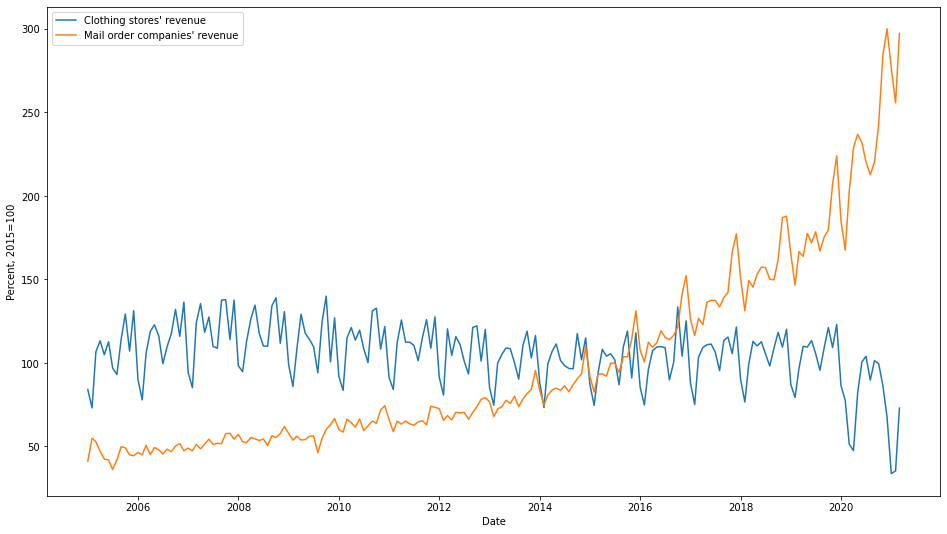

In [ ]:
# Do not modify the code in this cell.
import matplotlib.pyplot as plt
%matplotlib inline

try:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(months, clothing_stores_revenue, label="Clothing stores' revenue")
    ax.plot(months, mail_order_revenue, label="Mail order companies' revenue")
    ax.set_xlabel('Date')
    ax.set_ylabel('Percent, 2015=100')
    ax.legend()
    plt.show()
except Exception as e:
    print('There was an error creating the plot.\n'
          'Check if your lists are correctly named and assembled.\n'
          "Here's your error, for your debugging pleasure.")
    raise e

**8. How do the two branches compare? Discuss any yearly cycles you observe, as well as long-term developments. Also explain why you think these patterns are there. Pretend you are writing this to your supervisor or a client who asked you to analyze this dataset.**

*As can be seen from the plot, the revenue of clothing stores fluctuates quite a lot over an period of a year. This is caused by seasonal influence and 'koopdagen'. Weather conditions do have an influence on the revenue for clothing stores; on cold and rainy days the revenue will be less than on sunny and dry days. Also peaks in revenues can be seen for the december month, when more revenue can be made for Christmas.

Mail order companies also show fluctuations over the period of a year, but these fluctuations are less than for clothing stores. The influence of the weather on the revenue create an opposite effect for mail order companies compared to clothing store. On a rainy day the customer will choose to shop online instead of visiting a clothing store. Christmas peaks in revenue can also be seen for mail order companies. Here both peak together.

Over a longer period of time the plot show the rise of internet shopping. The revenue grows every year. Part of this growth is caused by a shifting from clothing stores to mail order companies. This is why both lines in the plot move in a opposite direction. 

Also the Covid-pandemic has had its influence on the revenue for both type of companies. Mail order companies took profit by extra revenue, because customers could not spend money on vacation itself or spend money abroad on their vacation. This partly explains the increase in revenue.
Clothing stores had to close the fysical shop and where not all set for sales in their own webshop. This causes the revenue to drop drastically at the beginning and at the end of the year 2020. Their customers bought the clothing online, which partly explains the increase of the mail order companies. 
As you can see in the plot, the revenue of clothing stores did increase when lockdown period 1 was over. But the revenue is not at the expected level. Some customers might have shifted in buying their clothes from mail order companies.
The question for the future is: 'Will customers turn back to the fysical shops (or the website of that shop) as they did before?' It is expected that the shifting of revenue from clothing stores to mail order companies will continue in the future. 
*

## 3. Computing With Data

### 3.1 Year Over Year Change

Let's take a closer look at these two branches of retail: clothing stores and mail order companies. A commonly used metric in business is the year-over-year revenue change. It is computed like so:

$$\text{YoY}_\text{month} = \frac{\text{Revenue}_\text{month}}{\text{Revenue}_\text{same month last year}} \times 100$$

Search the web for a longer explanation of this term if you'd like one.

**9. Why should we compare revenue for a particular month to the revenue of that same month, one year ago?**

*When you compare the revenue for a particular month to the revenue of that same month, one year ago, you take seasonal influences and performance measurements into account. If this month shows a increase of revenue of 2%, it looks like your business is going great because there is growth. But if last year the increase was 3%, your business is not growing as fast as it was. 

Also the difference in weather conditions and special Holidays has an influence on revenue. When you compare the revenue of a month to the same month last year , the conditions will be the same. This makes comparison more accurate.*

**10. In the code cell below, compute the year-over-year revenue change for every month, for both branches of the retail sector, each in their own new list. Skip the first year (why?). Put an `x` in the checkboxes when you're ready. Run the next cell to see a new plot for your data.**

- [x] Clothing stores $\Longrightarrow$ `clothing_stores_yoy`
- [x] Mail order companies $\Longrightarrow$ `mail_order_yoy`



In [ ]:
period = row['period']
year = period.year
month = period.month
day = period.day

period_this_year = datetime(year, month, day).date()
last_year = year - 1
period_last_year = datetime(last_year, month, day).date()
next_year = year + 1
period_next_year = datetime(next_year, month, day).date()
#print(period_last_year, period_this_year, period_next_year)

start_date = datetime(2006, 1, 1).date()
end_date = datetime(2020, 3, 1).date()


# The year-over-year revenue change for every month, for clothing stores:
list_clothing_revenue_this_year = []
list_clothing_revenue_last_year = []
for row in data:    
    if 'kleding' in row['industry']:
        if row['period'] >= start_date:
            clothing_revenue_this_year = row['revenue']
            list_clothing_revenue_this_year.append(clothing_revenue_this_year)
#print('This year clothing revenue is:', len(list_clothing_revenue_this_year), 
#      list_clothing_revenue_this_year)

for row in data:    
    if 'kleding' in row['industry']:
        if row['period'] <= end_date:
            clothing_revenue_last_year = row['revenue']
            list_clothing_revenue_last_year.append(clothing_revenue_last_year)
#print('Last year clothing revenue is:', len(list_clothing_revenue_last_year), 
#      list_clothing_revenue_last_year)

clothing_stores_yoy = []
for clothing_revenue_this_month, clothing_revenue_last_month in zip(
    list_clothing_revenue_this_year,list_clothing_revenue_last_year):
    clothing_yoy_month = round(((clothing_revenue_this_month/
                                 clothing_revenue_last_month)*100),1)
    clothing_stores_yoy.append(clothing_yoy_month)
print('Clothing stores yoy is:', len(clothing_stores_yoy), clothing_stores_yoy)
   

# The year-over-year revenue change for every month, for mail order companies:
list_mail_order_revenue_this_year = []
list_mail_order_revenue_last_year = []
for row in data:    
    if 'Postorderbedrijven' in row['industry']:
        if row['period'] >= start_date:
            mail_order_revenue_this_year = row['revenue']
            list_mail_order_revenue_this_year.append(mail_order_revenue_this_year)
#print('This year mail_order revenue is:', len(list_mail_order_revenue_this_year), 
#      list_mail_order_revenue_this_year)

for row in data:    
    if 'Postorderbedrijven' in row['industry']:
        if row['period'] <= end_date:
            mail_order_revenue_last_year = row['revenue']
            list_mail_order_revenue_last_year.append(mail_order_revenue_last_year)
#print('Last year mail_order revenue is:', len(list_mail_order_revenue_last_year), 
#      list_mail_order_revenue_last_year)

mail_order_yoy = []
for mail_order_revenue_this_month, mail_order_revenue_last_month in zip(
    list_mail_order_revenue_this_year,list_mail_order_revenue_last_year):
    mail_order_yoy_month = round(((mail_order_revenue_this_month/
                                   mail_order_revenue_last_month)*100),1)
    mail_order_yoy.append(mail_order_yoy_month)
print('Mail order companies yoy is:', len(mail_order_yoy), mail_order_yoy)

Clothing stores yoy is: 183 [107.0, 106.6, 99.2, 105.0, 117.1, 103.1, 102.8, 117.9, 102.9, 102.1, 108.2, 103.9, 104.8, 109.4, 117.1, 113.9, 96.3, 109.7, 110.3, 99.1, 116.9, 104.5, 98.4, 100.9, 104.2, 111.3, 91.1, 93.3, 113.8, 92.3, 100.3, 101.1, 97.5, 100.8, 98.1, 95.0, 100.6, 90.6, 95.5, 102.2, 87.6, 96.9, 99.6, 85.5, 92.9, 100.7, 90.1, 97.2, 92.9, 97.3, 106.5, 93.8, 96.4, 104.8, 98.8, 106.5, 105.1, 94.9, 107.5, 95.9, 99.3, 100.6, 97.6, 103.7, 98.9, 94.0, 101.8, 101.2, 87.9, 94.8, 100.5, 104.8, 100.2, 96.1, 107.5, 83.1, 102.9, 98.7, 91.4, 92.1, 105.2, 97.1, 92.9, 94.1, 93.1, 92.5, 83.0, 100.7, 94.1, 97.8, 99.3, 96.7, 91.2, 97.4, 101.9, 96.9, 103.6, 98.1, 99.6, 101.6, 102.2, 93.5, 98.1, 107.1, 87.3, 98.8, 98.9, 98.8, 98.5, 101.8, 94.5, 101.2, 93.4, 103.9, 103.6, 89.9, 113.6, 101.3, 89.3, 102.6, 98.4, 100.4, 102.2, 99.3, 105.2, 104.1, 107.1, 103.5, 91.5, 112.1, 114.3, 106.1, 102.9, 100.3, 107.7, 101.7, 101.3, 101.4, 97.5, 106.1, 113.2, 86.5, 101.5, 97.0, 102.2, 102.0, 95.8, 103.4, 99.4,

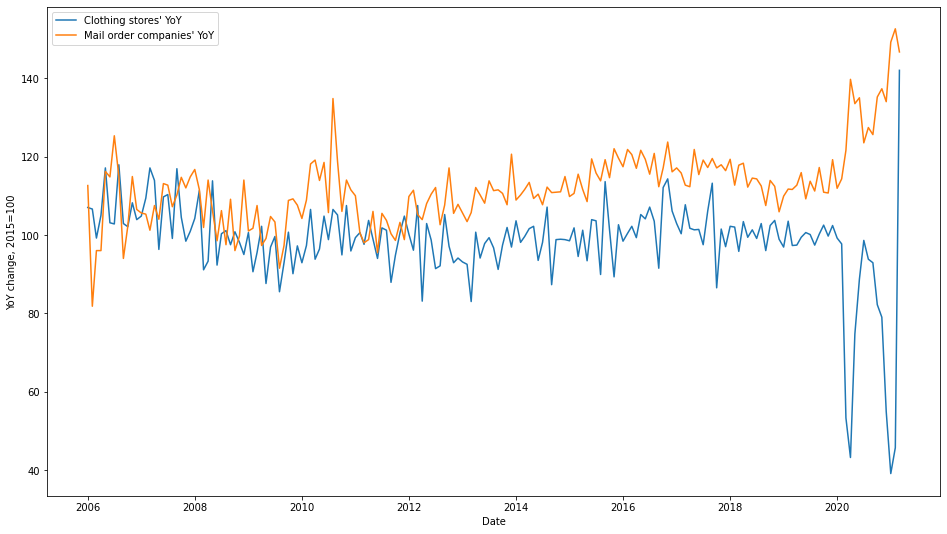

In [ ]:
try:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(months[12:], clothing_stores_yoy, label="Clothing stores' YoY")
    ax.plot(months[12:], mail_order_yoy, label="Mail order companies' YoY")
    ax.set_xlabel('Date')
    ax.set_ylabel('YoY change, 2015=100')
    ax.legend()
    plt.show()
except Exception as e:
    print('There was an error creating the plot.\n'
          'Check if your lists are correctly named and assembled.\n'
          "Here's your error, for your debugging pleasure.")
    raise e

**11. In the code cell below, find the best and worst months for both branches of the retail sector in terms of year-over-year revenue change. Print the branch, month and YoY in a nice and tidy way.**

In [ ]:
# The best month for clothing stores in terms of year-over-year revenue change: 
for clothing_yoy_month in clothing_stores_yoy:
    if max(clothing_stores_yoy) == clothing_yoy_month:
        index_clothing = ((clothing_stores_yoy).index(max(clothing_stores_yoy)))

for row in data:
    if 'kleding' in row['industry']:
        branch_clothing = row['industry']
        if row['period'] >= start_date:
            if str(list_clothing_revenue_this_year[index_clothing]) in str(row['revenue']):
                period_best_clothing = row['period']

print('The best month yoy for', branch_clothing, 'is:',
      period_best_clothing, 'with a yoy of', max(clothing_stores_yoy))


# The worst month for clothing stores in terms of year-over-year revenue change:
for clothing_yoy_month in clothing_stores_yoy:
    if min(clothing_stores_yoy) == clothing_yoy_month:
        index_clothing = ((clothing_stores_yoy).index(min(clothing_stores_yoy)))

for row in data:
    if 'kleding' in row['industry']:
        if row['period'] >= start_date:
            if str(list_clothing_revenue_this_year[index_clothing]) in str(row['revenue']):
                period_worst_clothing = row['period']

print('The worst month yoy for', branch_clothing, 'is:',
      period_worst_clothing, 'with a yoy of', min(clothing_stores_yoy))


# The best month for mail order companies in terms of year-over-year revenue change:
for mail_order_yoy_month in mail_order_yoy:
    if max(mail_order_yoy) == mail_order_yoy_month:
        index_mail_order = ((mail_order_yoy).index(max(mail_order_yoy)))

for row in data:
    if 'Postorderbedrijven' in row['industry']:
        branch_mail_order = row['industry']
        if row['period'] >= start_date:
            if str(list_mail_order_revenue_this_year[index_mail_order]) in str(row['revenue']):
                period_best_mail_order = row['period']
print('The best month yoy for', branch_mail_order, 'is:',
      period_best_mail_order, 'with a yoy of', max(mail_order_yoy))

# The worst month for mail order companies in terms of year-over-year revenue change:
for mail_order_yoy_month in mail_order_yoy:
    if min(mail_order_yoy) == mail_order_yoy_month:
        index_mail_order = ((mail_order_yoy).index(min(mail_order_yoy)))

for row in data:
    if 'Postorderbedrijven' in row['industry']:
        branch_mail_order = row['industry']
        if row['period'] >= start_date:
            if str(list_mail_order_revenue_this_year[index_mail_order]) in str(row['revenue']):
                period_worst_mail_order = row['period']
print('The worst month yoy for', branch_mail_order, 'is:',
      period_worst_mail_order, 'with a yoy of', min(mail_order_yoy))


The best month yoy for 4771 Winkels in kleding is: 2021-03-01 with a yoy of 142.0
The worst month yoy for 4771 Winkels in kleding is: 2021-01-01 with a yoy of 39.1
The best month yoy for 4791 Postorderbedrijven, webwinkels is: 2021-02-01 with a yoy of 152.6
The worst month yoy for 4791 Postorderbedrijven, webwinkels is: 2006-02-01 with a yoy of 81.8


### 3.2 Similarity Between Branches

We've seen that the pattern for revenue is quite different for clothing stores and mail order companies. In other words: their revenues don't move up or down together. A way to make this observation more specific is to compute the **correlation coefficient**. It is a number between $-1$ and $1$ that describes the relation between two *random variables*. Here is how it works applied to our revenue numbers:

- If the correlation coefficient for the revenue of two branches of the retail sector is $1$, their revenue is *positively correlated*. This means that when the revenue of branch A goes up, the revenue of branch B also goes up. In other words: the revenues for both branches go up together.
- If the correlation coefficient is $-1$, the revenues of the two branches are *negatively correlated*. This means that if A's revenue goes up, B's revenue goes down. Similarly, if B's revenue goes up, A's revenue goes down. They move in the exact opposite direction.
- If the correlation coefficient is $0$, there is no clear pattern between the revenues of both branches.

Here's a table that summarizes this information:

| Correlation coefficient | Meaning                              |
|-------------------------|--------------------------------------|
| $1$                     | Revenues go up together              |
| $0$                     | No pattern                           |
| $-1$                    | Revenues move in opposite directions |

Note that there is a continuous scale between $-1$ and $1$! A correlation coefficient of $0.3$ indicates a somewhat positively correlated relationship.

And here's an image that visualizes the correlation coefficient.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg"/>

We've provided a function `corrcoef` that computes the correlation coefficient for two lists.

**11. In the code cell below, use the function `corrcoef` to compute the correlation coefficient for each pair of branches in our dataset. Then print a sorted table that shows each unique pair and their correlation coefficients. Sort by the correlation coefficient, in descending order. You can take inspiration from this table (but it doesn't have to look exactly like it):**

```
Coeff   Branch A                                          Branch B                                          
===========================================================================================================
0.98    4711, 472 Winkels in voedingsmiddelen             4711 Supermarkten                                 
0.91    475 Winkels in overige huishoudwaren              4752 Winkels in doe-het-zelfartikelen             
0.91    47528 Bouwmarkten                                 4752 Winkels in doe-het-zelfartikelen               
```

In [ ]:
import numpy as np

# Provided function. Use this to obtain the correlation coefficient for two lists.
def corrcoef(branch_a, branch_b):
    return np.corrcoef(branch_a, branch_b)[0, 1]

# Make pairs of branches in the dataset
list_branches = []
for row in data:
    branche = row['industry']
    if branche not in list_branches:
        list_branches.append(branche)

pairs = [(a, b) for idx, a in enumerate(list_branches) for b in list_branches [idx+1:]]
print(len(pairs), pairs)


# Make a revenue list for the pairs of branches in the dataset
branch_a = []
branch_b = []

for row in data:
    revenue_value = row['revenue']
    for (a, b) in pairs:
        if (a) in row['industry']:
            print('a is:', type(a), a)
            branch_a.append(revenue_value)
        if (b) in row['industry']: 
            print('b is:', type(b), b)
            branch_b.append(revenue_value)
print('Branche A is:', len(branch_a), branch_a) 
print('Branche B is:', len(branch_b), branch_b)

# Obtain the correlation coefficient for the pairs of branches in the dataset
list_corrcoef = []
for a, b in pairs:
#    print(a, b, corrcoef) --> corrcoef in function object
    correlation_coefficient = round(corrcoef(branch_a, branch_b), 2)
    list_corrcoef.append(correlation_coefficient)
print(len(list_corrcoef), list_corrcoef)

# Make a table of the data for the pairs of branches with the correlation 
# coefficient in the dataset
list_table_data = []
for a, b in pairs:
    list_pair_data = [correlation_coefficient, a, b]
    list_table_data.append(list_pair_data)
print(list_table_data)

#    list_table_data_sorted1 = sorted(list_table_data, key=corrcoef, reverse=True)
#print(list_table_data_sorted1)
#    list_table_data_sorted2 = list_table_data.sort(key=corrcoef, reverse=True)
#    print(list_table_data_sorted2)

head = ['Correlation coefficient', 'Branche A', 'Branche B']
#print(tabulate(list_table_data, headers=head, tablefmt='grid', disable_numparse=True))
#(floatfmt='.1f') --> TypeError: 'floatfmt' is an invalid keyword argument for print()

120 [('4711, 472 Winkels in voedingsmiddelen', '4711 Supermarkten'), ('4711, 472 Winkels in voedingsmiddelen', '4719, 474-477 Winkels in non-foodart.'), ('4711, 472 Winkels in voedingsmiddelen', '472 Winkels in voedingsmiddelen'), ('4711, 472 Winkels in voedingsmiddelen', '474 Winkels in consumentenelektronica'), ('4711, 472 Winkels in voedingsmiddelen', '475 Winkels in overige huishoudwaren'), ('4711, 472 Winkels in voedingsmiddelen', 'Winkels in meubels, woninginrichting alg'), ('4711, 472 Winkels in voedingsmiddelen', '4752 Winkels in doe-het-zelfartikelen'), ('4711, 472 Winkels in voedingsmiddelen', '47528 Bouwmarkten'), ('4711, 472 Winkels in voedingsmiddelen', '4759 Winkels overige huishoudartikelen'), ('4711, 472 Winkels in voedingsmiddelen', '476 Winkels in recreatieartikelen'), ('4711, 472 Winkels in voedingsmiddelen', '4765 Speelgoedwinkels'), ('4711, 472 Winkels in voedingsmiddelen', '4771 Winkels in kleding'), ('4711, 472 Winkels in voedingsmiddelen', '4772 Winkels in schoe

ValueError: ignored

**12. Pick two correlation coefficients from the table you created and explain why you think these values are the way that they are. Be sure to pick two coefficients that are not close to each other.**

*TODO: Your answer here.*

**13. Imagine you are a very risk-averse investor shaping your portfolio of investments in the retail sector. How would you use the information in the table you created to minimize your investment risk? Which two branches of the retail sector would you invest in if you had to pick two? Use the correlation coefficient in your answer.**

*TODO: Your answer here.*

## 4. Conclusion

You made it! This was the Retail assignment. Before you hand it in: restart the kernel and run all the cells. Then save it to GitHub and share the link with us in the usual way.